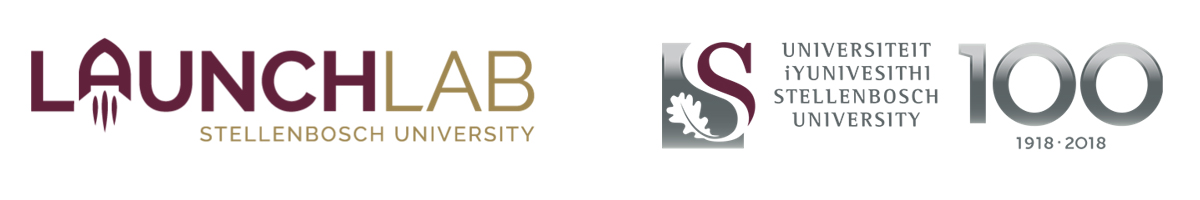

# Assignment \#7: Unsupervised Learning

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# install scikit image to import the following package
from skimage import io, color

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import NMF
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from IPython.display import Image

## Dimensionality reduction

We start of by doing PCA on the Iris dataset. This dataset represents measurements of 150 iris flowers, along with a response variable (target) indicating which of three iris species each set of measurements corresponds to. Once the data is loaded, these species (classes) are simply 0, 1, and 2.

The recorded attributes for an iris flower:

1. sepal length in cm

2. sepal width in cm

3. petal length in cm

4. petal width in cm

In [47]:
# Load dataset
iris_data = load_iris()
data = iris_data.data
labels = iris_data.target
classes = set(labels)
target_names = iris_data.target_names
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

## Explore the dataset by plotting the sepal length against the sepal width.
Label the points according to their species.

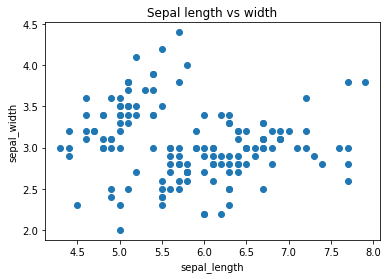

In [48]:
# Insert code
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Sepal length vs width')
plt.show()

## Next, the data is fitted with PCA. 
First we fit with 3 principal components in order to investiage how much of the variance is explained by the components. 

Explain the meaning of the graph below.

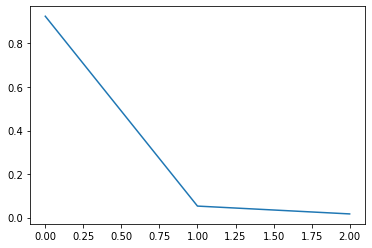

array([0.92461872, 0.05306648, 0.01710261])

In [50]:
pca = PCA(n_components=3)
pca.fit(data)
plt.plot(pca.explained_variance_ratio_)
plt.show()

*This is the percentage of variance that is attributed by each of the selected components*

## Project the data onto the first two principal components 
Plot the 2-dimensional representation of the 3 classes in different colours. 

Your output should look similar to the image below.

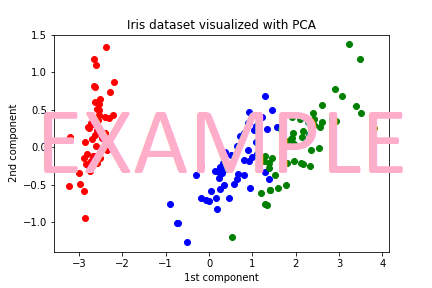

PCA(n_components=3)

In [24]:
 # Example output
 display(Image(filename="src/iris_pca.png"))

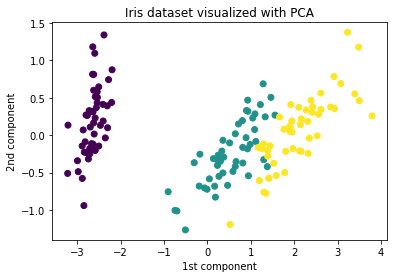

In [41]:
# Insert code to produce image above
transformed = pca.transform(data)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=labels)
plt.title('Iris dataset visualized with PCA')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

Here we can see how much class separation is obtained by projecting onto the first two principal components. 

Calcualte the percentage information loss. [1 point]

Comment on whether you think this is a good projection. [2 points]

In [63]:
# Calculate % information lost
print(pca.explained_variance_ratio_)
print('\n Thus ' + str(pca.explained_variance_ratio_[2]*100) + ' % of information lost')

[0.92461872 0.05306648 0.01710261]

 Thus 1.7102609807929763 % of information lost


*Yes, as the 2d projection still contains 97.8% of the informantion*

## Now use t-SNE to visualise iris dataset in 2-dimensional space.

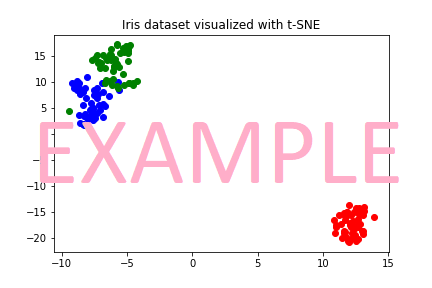

In [4]:
# Import library
from sklearn.manifold import TSNE

# Example output
display(Image(filename="src/iris_tsne.png"))

/home/chris/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


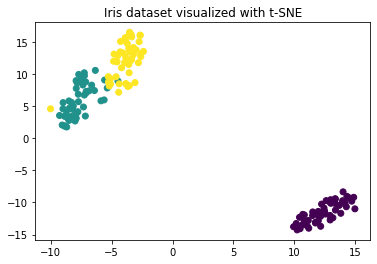

In [230]:
# Insert code produce a similar graph
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=labels)
plt.title('Iris dataset visualized with t-SNE')
plt.show()

## Discuss the main differences between PCA and t-SNE that leads to the two different plots.
*PCA is a linear Dimensionality reduction technique while t-SNE is a non-linear one. PCA tries to preserve the global structure of the data while t-SNE tries to preserve the local structure.*

## Clustering

Complete the class to implement the K-means algorithm.

## Function "fit()" 
Takes in d-dimensional data and applies the EM step to find and print the cluser centroids.

Initialize your means with random samples.

## Function "predict()"
Takes in a set of observations and predicts their labels based on the nearest cluster centroids.

Returns a list of predicted labels

In [322]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

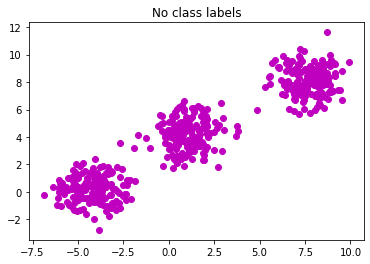

In [331]:
n_samples = 500
blobs = datasets.make_blobs(n_samples=n_samples, random_state=3)
blobs_data = blobs[0]
blobs_labels = blobs[1]

plt.title("No class labels")
plt.scatter(x=blobs_data[:,0], y=blobs_data[:,1], c="m")
plt.show()

## Apply your K-Means algorithm to the random generated dataset above
Plot the data, assigning a different colour to each cluster. 

Your result should look something like the image below.

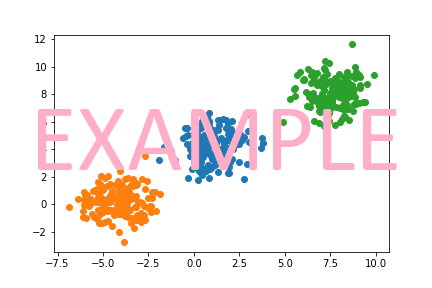

In [324]:
 # Example output
 display(Image(filename="src/my_pca.png"))

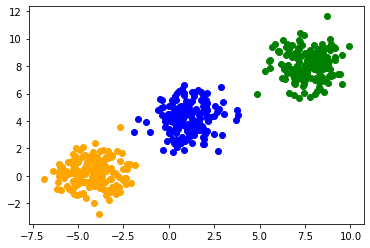

In [332]:
# Apply K-means on blobs_data
from IPython.display import clear_output
model = K_Means(k=3)
model.fit(blobs_data)
colors=['blue', 'green', 'orange']
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], c=color)
        
clear_output()
plt.show()

## Given the data distibution below, perform K-Means 
Use your own library or the scikit-learn implementation and plot the data showing the two clusters.

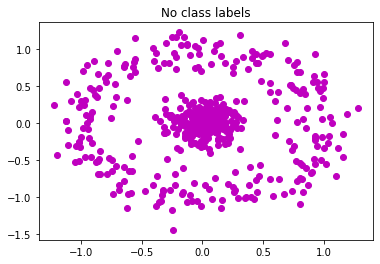

In [334]:
# Generate noisy cirlces
n_samples = 500
circles = datasets.make_circles(n_samples=n_samples, factor=.05, noise=.15, random_state=1)
circles_data = circles[0]
circles_labels = circles[1]

plt.title("No class labels")
plt.scatter(x=circles_data[:,0], y=circles_data[:,1], c="m")
plt.show()

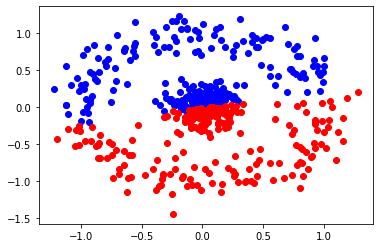

In [336]:
# Insert code for K-means on noisy circles
model = K_Means(k=2)
model.fit(circles_data)
colors=['blue', 'red']
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], c=color)
        
clear_output()
plt.show()

## Comment on what you observe.
*The data is split in a top and bottom half*

## Now use DBSCAN clustering on the same data. 
Again, plot the result showing the cluster seperation. 

Hint: You need to tune the eps value. 

Your result should like something like the image below.

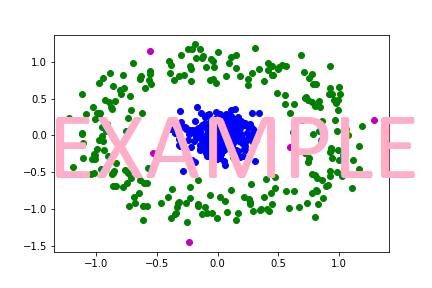

In [7]:
# Example output
display(Image(filename="src/dbscan.png"))

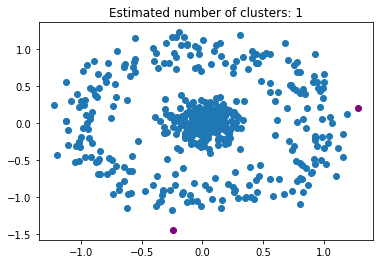

In [377]:
# Insert code here
db = DBSCAN(eps=0.29).fit(circles_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = ['g', 'b']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = circles_data[class_member_mask & core_samples_mask]
    
    plt.scatter(xy[:, 0], xy[:, 1])

    xy = circles_data[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c='purple')

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


## Discuss the pros and cons for KMeans and DBSCAN.
*In KMeans, clusters formed are more or less spherical or convex in shape and must have same feature size. In DBSCAN, clusters formed are arbitrary in shape and may not have same feature size. K-means Clustering does not work well with outliers and noisy datasets. DBSCan Clustering can not efficiently handle high dimensional datasets.*

## Image compression Using dimension reduction


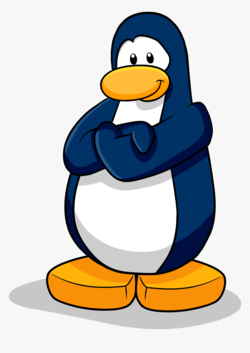

In [70]:
display(Image(filename="src/penguin.png"))

Note that the colors in the image above are clustered around only a few colors (whose values are stored in numerical variables). 

## Using the k-means algorith find the clusters and reprodue the image using only 4 colours (k=4). 

The result looks something like the image below.

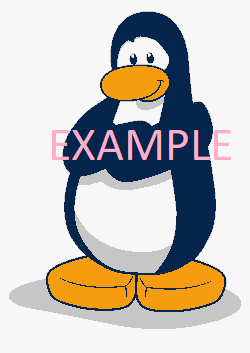

In [9]:
display(Image(filename="src/penguin_compressed.png"))

In [13]:
# Load image
image = io.imread("src/penguin.png")
# Convert from rgba to rgb
image = color.rgba2rgb(image)
# Show image dimension
print(image.shape)

(353, 250, 3)


In [73]:
# Insert code here

## Print the number of clusters required for a perfect reproduction.

In [74]:
# Insert code

## Hierarchical clustering
Now we will be performing hierarchical clustering on shopping data. 

The goal is to divide customers into dfferent groups based on their shopping trends. 

The data is located in "shopping-data.scv". First, let us explore the data.

In [14]:
# Load the data
customer_data = pd.read_csv("src/shopping-data.csv")

# Explore data
customer_data.shape
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. 

## Extract the "Annual Income (k$)" and "Spending Score" columns as a two-dimensional numpy array. 
Print the first row

In [77]:
# Insert code to extract relevant data from relevant columns

## Perform hierarchical clustering on the data
Plot the results in a dendogram.

Hint: use the scipy package imported shc

In [78]:
# Insert code here

## Determine the number of clusters in which to split the data 
Thereafter, assign a cluster label to each data point (Using AgglomerativeClusting()).

Hint: The ideal number of clusters is present at a height of 150-200 in the dendogram.

In [79]:
# Insert code here

## Plot "Annual Income (k$)" vs "Spending Score" clearly labeling the clusters.

In [80]:
# Insert code here

## Identify two clusters of people you would target. Give a reason for your answer.
*Answer here*

## Non-negative matrix factorization
Let's apply NMF, using the tf-idf word-frequency array of Wikipedia articles. 

First explore the data. 

The data consist of a list of article titles and a list of words. The tf-idf word frequency of each word is given in a csr matrix called articles.

In [18]:
df_articles = pd.read_csv('src/Wikipedia articles/wikipedia-vectors.csv', index_col=0)

# articles in csr matrix format
articles = csr_matrix(df_articles.transpose())
# article titles
titles = list(df_articles.columns)
# article keywords
words = pd.read_csv('src/Wikipedia articles/wikipedia-vocabulary-utf8.txt', header=None).iloc[:, 0].tolist()

# For visualization
# Use raw (non csr matrix)
raw_articles = df_articles.transpose()
df = pd.DataFrame(raw_articles, index=titles)
df.columns = words
df.head()


,aaron,abandon,abandoned,abandoning,abandonment,abbas,abbey,abbreviated,abbreviation,abc,...,zealand,zenith,zeppelin,zero,zeus,zimbabwe,zinc,zone,zones,zoo
HTTP 404,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Alexa Internet,0.0,0.0,0.029607,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Internet Explorer,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.003772,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011594,0.000000,0.0
HTTP cookie,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Google Search,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.006649,0.0


## Now fit and transform the articles. First, create an NMF instance using 6 components.

In [83]:
# Insert code here 

## Now fit the model to articles and transform to obtain the nmf_features.


In [84]:
# Insert code here

## Put the features in a pandas dataframe using the article titles as index.

In [85]:
# Insert code here

## Now that you have the features, display the 6 components for article with title "Zlatan Ibrahimović". 

In [86]:
# Insert code

## Now display the 6 components for article with title "Neymar". 

In [87]:
# Insert code

What do you observe? Explain what this mean.

Answer:

Verify your assumption above by identifying the corresponding NMF components (i.e. the words that both articles have in common)

In [88]:
# Insert code here

